In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | thinadhoo
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | port antonio
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | suba
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | frederico westphalen
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | port lincoln
Processing Record 23 of Set 

City not found. Skipping...
Processing Record 44 of Set 4 | kuusamo
Processing Record 45 of Set 4 | opuwo
Processing Record 46 of Set 4 | mogocha
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | warrington
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | naze
Processing Record 3 of Set 5 | carutapera
Processing Record 4 of Set 5 | songea
Processing Record 5 of Set 5 | havelock
Processing Record 6 of Set 5 | apatou
Processing Record 7 of Set 5 | barawe
City not found. Skipping...
Processing Record 8 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 9 of Set 5 | saint-joseph
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | mufulira
Processing Record 12 of Set 5 | nizhnevartovsk
Processing Record 13 of Set 5 | strasice
Processing Record 14 of Set 5 | languyan
Processing Record 15 of Set 5 | batagay-alyta
Processing Reco

Processing Record 32 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 33 of Set 8 | grenaa
Processing Record 34 of Set 8 | kashi
Processing Record 35 of Set 8 | las cruces
Processing Record 36 of Set 8 | colares
Processing Record 37 of Set 8 | mocambique
City not found. Skipping...
Processing Record 38 of Set 8 | luderitz
Processing Record 39 of Set 8 | honiara
Processing Record 40 of Set 8 | shitanjing
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | kodiak
Processing Record 43 of Set 8 | barreirinhas
Processing Record 44 of Set 8 | bangolo
Processing Record 45 of Set 8 | rocha
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | belle fourche
Processing Record 48 of Set 8 | gondanglegi
Processing Record 49 of Set 8 | lander
Processing Record 50 of Set 8 | buraydah
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | gilgit
Processing Record 3 of Set 9 | baracatan
Processing Record 4 of Set 9 | geraldton
Pro

Processing Record 14 of Set 12 | voznesenye
Processing Record 15 of Set 12 | half moon bay
Processing Record 16 of Set 12 | sangar
Processing Record 17 of Set 12 | warqla
City not found. Skipping...
Processing Record 18 of Set 12 | lotofaga
Processing Record 19 of Set 12 | am timan
Processing Record 20 of Set 12 | chisindia
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | norwalk
Processing Record 23 of Set 12 | mao
Processing Record 24 of Set 12 | tutoia
Processing Record 25 of Set 12 | seminole
Processing Record 26 of Set 12 | lyngseidet
Processing Record 27 of Set 12 | bloemfontein
Processing Record 28 of Set 12 | sitangkai
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | husavik
Processing Record 31 of Set 12 | denpasar
Processing Record 32 of Set 12 | chulym
Processing Record 33 of Set 12 | kangaatsiaq
Processing Record 34 of Set 12 | alice springs
Processing Record 35 of Set 12 | bealanana
Processing Record 36 of Set 12 | graaff-reine

In [8]:
len(city_data)

551

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,20.23,67,23,8.41,US,2022-01-19 00:12:39
1,Ushuaia,-54.8000,-68.3000,47.77,94,80,5.14,AR,2022-01-19 00:10:41
2,Punta Arenas,-53.1500,-70.9167,55.51,67,40,21.85,CL,2022-01-19 00:12:39
3,Thinadhoo,0.5333,72.9333,82.24,77,100,8.81,MV,2022-01-19 00:12:40
4,Lebu,-37.6167,-73.6500,57.16,74,76,14.00,CL,2022-01-19 00:12:40
5,Port Antonio,18.1800,-76.4612,73.94,84,24,5.46,JM,2022-01-19 00:12:40
6,Hobart,-42.8794,147.3294,71.02,56,75,3.00,AU,2022-01-19 00:09:09
7,Hilo,19.7297,-155.0900,80.80,89,100,9.22,US,2022-01-19 00:12:41
8,Longyearbyen,78.2186,15.6401,13.84,79,75,16.11,SJ,2022-01-19 00:12:41
9,Cabo San Lucas,22.8909,-109.9124,84.61,61,20,9.22,MX,2022-01-19 00:12:42


In [10]:
# Reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-19 00:12:39,42.6001,-73.9662,20.23,67,23,8.41
1,Ushuaia,AR,2022-01-19 00:10:41,-54.8000,-68.3000,47.77,94,80,5.14
2,Punta Arenas,CL,2022-01-19 00:12:39,-53.1500,-70.9167,55.51,67,40,21.85
3,Thinadhoo,MV,2022-01-19 00:12:40,0.5333,72.9333,82.24,77,100,8.81
4,Lebu,CL,2022-01-19 00:12:40,-37.6167,-73.6500,57.16,74,76,14.00
5,Port Antonio,JM,2022-01-19 00:12:40,18.1800,-76.4612,73.94,84,24,5.46
6,Hobart,AU,2022-01-19 00:09:09,-42.8794,147.3294,71.02,56,75,3.00
7,Hilo,US,2022-01-19 00:12:41,19.7297,-155.0900,80.80,89,100,9.22
8,Longyearbyen,SJ,2022-01-19 00:12:41,78.2186,15.6401,13.84,79,75,16.11
9,Cabo San Lucas,MX,2022-01-19 00:12:42,22.8909,-109.9124,84.61,61,20,9.22


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
#import csv file for city data
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2022-01-19 00:12:39,42.6001,-73.9662,20.23,67,23,8.41
1,1,Ushuaia,AR,2022-01-19 00:10:41,-54.8000,-68.3000,47.77,94,80,5.14
2,2,Punta Arenas,CL,2022-01-19 00:12:39,-53.1500,-70.9167,55.51,67,40,21.85
3,3,Thinadhoo,MV,2022-01-19 00:12:40,0.5333,72.9333,82.24,77,100,8.81
4,4,Lebu,CL,2022-01-19 00:12:40,-37.6167,-73.6500,57.16,74,76,14.00


In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

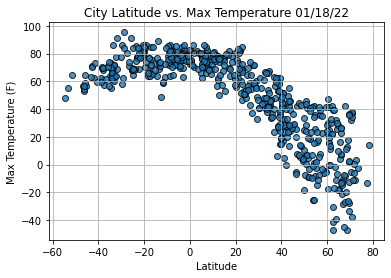

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

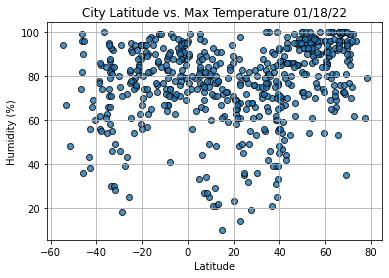

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

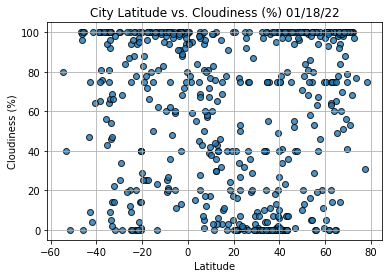

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

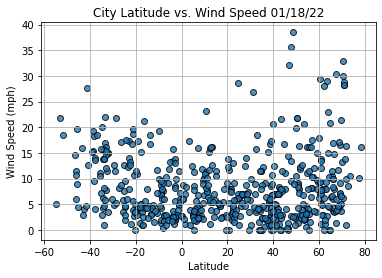

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Laguna
Country                        US
Date          2022-01-19 00:12:43
Lat                        38.421
Lng                     -121.4238
Max Temp                    62.69
Humidity                       62
Cloudiness                      0
Wind Speed                   1.01
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

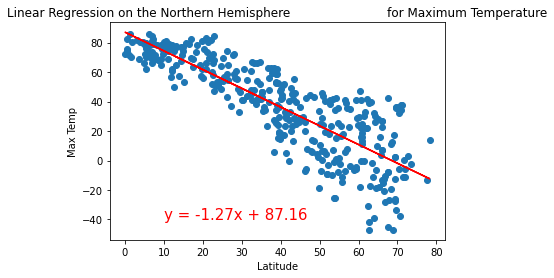

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))


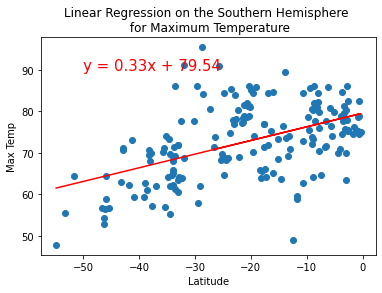

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [44]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.3296536259204508, intercept=79.53963993299014, rvalue=0.5004338092507783, pvalue=8.470444539784266e-13, stderr=0.0427470503901054, intercept_stderr=1.070093387260034)

In [45]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.2721343049310638, intercept=87.16086876805647, rvalue=-0.8385672726287815, pvalue=2.317510470214473e-99, stderr=0.04302465800319833, intercept_stderr=1.9088034963864746)

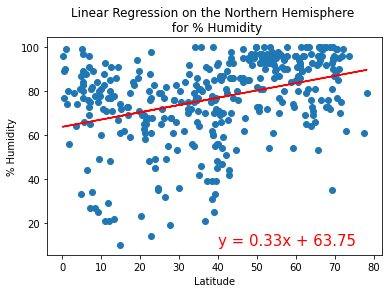

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

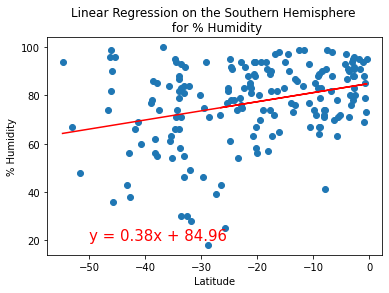

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

In [56]:
linregress(southern_hemi_df["Lat"],southern_hemi_df['Humidity'])

LinregressResult(slope=0.37797453759091015, intercept=84.96264621231725, rvalue=0.30796674915792144, pvalue=2.602763376040618e-05, stderr=0.08752065259366344, intercept_stderr=2.190917753025604)

In [57]:
linregress(northern_hemi_df["Lat"],northern_hemi_df['Humidity'])

LinregressResult(slope=0.3318836875664738, intercept=63.753247594112565, rvalue=0.36208107713097737, pvalue=6.188195783127263e-13, stderr=0.04447860086903994, intercept_stderr=1.9733081631210323)

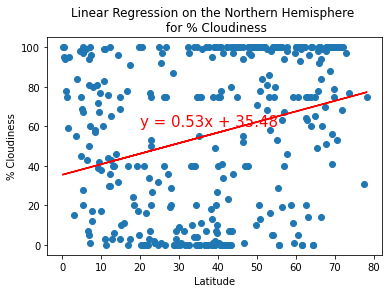

In [61]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,60))

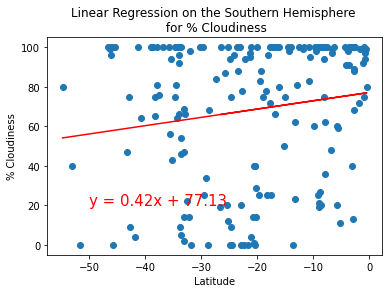

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))

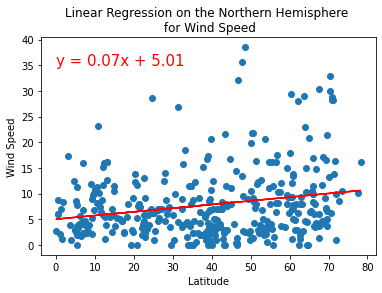

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,35))

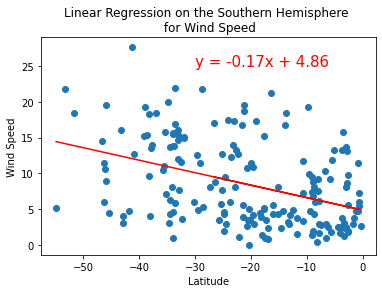

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,25))